In [9]:
import pandas as pd


In [10]:
# Read the CSV file into a dataframe
df = pd.read_csv('adverts.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
df.describe()

In [12]:
print(df.columns)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')


In [13]:
null_counts = df.isnull().sum()

# Print the count of missing values for each column
print(null_counts)

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [14]:
# mileage , body type and fuel type are small in comaprison to the total so i will just drop it
n_row_before = len(df)
df = df.dropna(subset=['mileage', 'body_type','fuel_type'])
n_row_after = len(df)

print("number of rows before", n_row_before)
print("number of rows after", n_row_after)
print("the diffrence")
print(n_row_before -n_row_after )

number of rows before 402005
number of rows after 400520
the diffrence
1485


In [16]:
null_counts = df.isnull().sum()

# Print the count of missing values for each column
print(null_counts)

public_reference             0
mileage                      0
reg_code                 31551
standard_colour           5257
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     32664
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64


In [15]:
n_fuel_type = df['fuel_type'].nunique()
print(f'Number of Fuel Types: {n_fuel_type}')
fuel_types = df['fuel_type'].unique()
print(f'Unique cities: {fuel_types}')


Number of Fuel Types: 9
Unique cities: ['Petrol Plug-in Hybrid' 'Diesel' 'Petrol' 'Diesel Hybrid' 'Petrol Hybrid'
 'Electric' 'Diesel Plug-in Hybrid' 'Bi Fuel' 'Natural Gas']


In [18]:
# now to deal with reg_code,standard_color and year of registration
# reg code might have nothing to do with the data but lets investigate and check correlation
n_reg_code_type = df['reg_code'].nunique()
print(f'Number of Registration code type : {n_reg_code_type}')

Number of Registration code : 68


/var/folders/2f/sm6c6lzd6z75rjm6cfkdc4bw0000gn/T/ipykernel_45929/2170480541.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['vehicle_condition', 'price']].corr()


<AxesSubplot: >

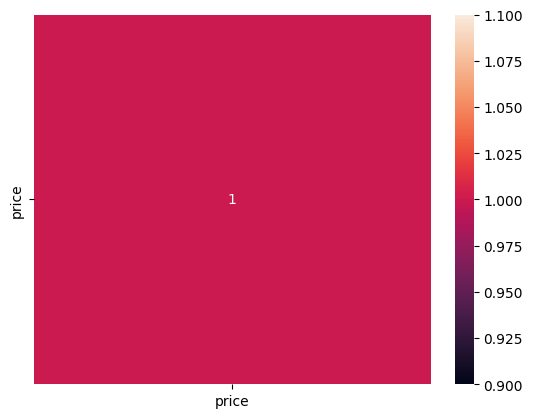

In [25]:
import seaborn as sns

# Calculate the correlations between the columns
corr_matrix = df[['vehicle_condition', 'price']].corr()

# Create a seaborn heatmap
sns.heatmap(corr_matrix, annot=True)

In [26]:
ct =  pd.crosstab(df['vehicle_condition'], df['price'])
corr = ct.corr()

# Create a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
n_fuel_type = df['fuel_type'].nunique()
print(f'Number of Fuel Types: {n_fuel_type}')
fuel_types = df['fuel_type'].unique()
print(f'Unique cities: {fuel_types}')